In [6]:
import spacy
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline
import pandas as pd
import json
tokenizer = AutoTokenizer.from_pretrained("dslim/bert-base-NER")
model = AutoModelForTokenClassification.from_pretrained("dslim/bert-base-NER")
ner_pipeline = pipeline("ner", model=model, tokenizer=tokenizer, aggregation_strategy="simple")
nlp = spacy.load("en_core_web_sm")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/59.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/829 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/433M [00:00<?, ?B/s]

Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


In [7]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)


BertForTokenClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12

In [8]:
ner_pipeline = pipeline("ner", model=model, tokenizer=tokenizer, aggregation_strategy="simple", device=0 if torch.cuda.is_available() else -1)



Device set to use cpu


In [9]:
!pip install transformers datasets seqeval



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16162 sha256=23d45267063f522f7cb4c20dff177d391134b377a17627c5aaa90947031ee868
  Stored in directory: /root/.cache/pip/wheels/bc/92/f0/243288f899c2eacdfa8c5f9aede4c71a9bad0ee26a01dc5ead
Successfully built seqeval


In [10]:
from datasets import load_dataset, load_metric
from transformers import AutoTokenizer, AutoModelForTokenClassification, TrainingArguments, Trainer
import numpy as np


In [3]:
!ls


NM  nm.csv


In [4]:
from datasets import load_dataset

dataset = load_dataset("conll2003", data_dir="/content/")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/12.3k [00:00<?, ?B/s]

conll2003.py:   0%|          | 0.00/9.57k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/14041 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3250 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3453 [00:00<?, ? examples/s]

In [5]:
from google.colab import files

# Upload files (choose all required files at once)
uploaded = files.upload()

# List files to verify upload
!ls /content/

# Now load the dataset from /content/ (where files got uploaded)
from datasets import load_dataset

dataset = load_dataset("conll2003", data_dir="/content/")

print(dataset)


Saving nm.csv to nm (1).csv
 NM  'nm (1).csv'   nm.csv
DatasetDict({
    train: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 14041
    })
    validation: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 3250
    })
    test: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 3453
    })
})


In [11]:
from datasets import load_dataset

dataset = load_dataset('csv', data_files='nm.csv')
print(dataset)


Generating train split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'date', 'client_id', 'card_id', 'amount', 'use_chip', 'merchant_id', 'merchant_city', 'merchant_state', 'zip', 'mcc'],
        num_rows: 1025
    })
})


In [12]:
from google.colab import files
files.upload()


Saving nm.csv to nm (2).csv


{'nm (2).csv': b'id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc\r\n7475327,01-01-2010 00:01,1556,2972,$-77.00,Swipe Transaction,59935,Beulah,ND,58523,5499\r\n7475328,01-01-2010 00:02,561,4575,$14.57,Swipe Transaction,67570,Bettendorf,IA,52722,5311\r\n7475329,01-01-2010 00:02,1129,102,$80.00,Swipe Transaction,27092,Vista,CA,92084,4829\r\n7475331,01-01-2010 00:05,430,2860,$200.00,Swipe Transaction,27092,Crown Point,IN,46307,4829\r\n7475332,01-01-2010 00:06,848,3915,$46.41,Swipe Transaction,13051,Harwood,MD,20776,5813\r\n7475333,01-01-2010 00:07,1807,165,$4.81,Swipe Transaction,20519,Bronx,NY,10464,5942\r\n7475334,01-01-2010 00:09,1556,2972,$77.00,Swipe Transaction,59935,Beulah,ND,58523,5499\r\n7475335,01-01-2010 00:14,1684,2140,$26.46,Online Transaction,39021,ONLINE,,,4784\r\n7475336,01-01-2010 00:21,335,5131,$261.58,Online Transaction,50292,ONLINE,,,7801\r\n7475337,01-01-2010 00:21,351,1112,$10.74,Swipe Transaction,3864,Flushing,NY,11355,5813\

In [14]:
from transformers import AutoTokenizer


In [15]:
from transformers import AutoTokenizer, AutoModelForTokenClassification


In [16]:
!pip install transformers


In [18]:
from datasets import load_dataset

dataset = load_dataset("conll2003")
label_list = dataset["train"].features["ner_tags"].feature.names
print(label_list)


['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC', 'B-MISC', 'I-MISC']


In [19]:
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForTokenClassification

# Load dataset and labels
dataset = load_dataset("conll2003")
label_list = dataset["train"].features["ner_tags"].feature.names

model_name = "bert-base-cased"

# Load tokenizer and model with correct number of labels
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForTokenClassification.from_pretrained(model_name, num_labels=len(label_list))


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [20]:
def tokenize_and_align_labels(examples):
    tokenized_inputs = tokenizer(examples["tokens"], truncation=True, is_split_into_words=True)

    labels = []
    for i, label in enumerate(examples["ner_tags"]):
        word_ids = tokenized_inputs.word_ids(batch_index=i)  # Map tokens to words
        previous_word_idx = None
        label_ids = []
        for word_idx in word_ids:
            if word_idx is None:
                label_ids.append(-100)  # Special token
            elif word_idx != previous_word_idx:
                label_ids.append(label[word_idx])  # Label for first token of word
            else:
                label_ids.append(label[word_idx] if True else -100)  # Label for subword tokens (set to -100 if you want to ignore)
            previous_word_idx = word_idx
        labels.append(label_ids)

    tokenized_inputs["labels"] = labels
    return tokenized_inputs

tokenized_datasets = dataset.map(tokenize_and_align_labels, batched=True)


Map:   0%|          | 0/14041 [00:00<?, ? examples/s]

Map:   0%|          | 0/3250 [00:00<?, ? examples/s]

Map:   0%|          | 0/3453 [00:00<?, ? examples/s]

In [24]:
pip install evaluate


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 5.4 MB/s eta 0:00:00


In [25]:
import evaluate


In [26]:
metric = evaluate.load("seqeval")


In [27]:
!pip install evaluate


In [29]:
import evaluate
metric = evaluate.load("seqeval")


In [30]:
def compute_metrics(p):
    predictions, labels = p
    predictions = np.argmax(predictions, axis=2)

    true_labels = [[label_list[l] for l in label if l != -100] for label in labels]
    true_predictions = [
        [label_list[p] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]

    results = metric.compute(predictions=true_predictions, references=true_labels)
    return {
        "precision": results["overall_precision"],
        "recall": results["overall_recall"],
        "f1": results["overall_f1"],
        "accuracy": results["overall_accuracy"],
    }

In [32]:
from transformers import Trainer, TrainingArguments


In [33]:
from transformers import Trainer, TrainingArguments


In [35]:
pip install --upgrade transformers


In [37]:
import transformers
print(transformers.__version__)


4.51.3


In [38]:
!pip install transformers datasets evaluate


In [39]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from datasets import load_dataset
import evaluate


In [41]:
per_device_train_batch_size=8,
per_device_eval_batch_size=8,


import transformers
print(transformers.__version__)


In [46]:
from transformers import TrainingArguments


In [48]:
from transformers import TrainingArguments

print(TrainingArguments)   # What does it show?
print(dir(TrainingArguments))  # Check available attributes/methods


<class 'transformers.training_args.TrainingArguments'>
['_VALID_DICT_FIELDS', '__annotations__', '__class__', '__dataclass_fields__', '__dataclass_params__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__match_args__', '__module__', '__ne__', '__new__', '__post_init__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_dict_torch_dtype_to_str', '_n_gpu', '_no_sync_in_gradient_accumulation', '_setup_devices', 'accelerator_config', 'adafactor', 'adam_beta1', 'adam_beta2', 'adam_epsilon', 'auto_find_batch_size', 'average_tokens_across_devices', 'batch_eval_metrics', 'bf16', 'bf16_full_eval', 'data_seed', 'dataloader_drop_last', 'dataloader_num_workers', 'dataloader_persistent_workers', 'dataloader_pin_memory', 'dataloader_prefetch_factor', 'ddp_backend', 'ddp_broadcast_bu

In [ ]:
!pip install --upgrade transformers
import os
os.kill(os.getpid(), 9)  # This restarts your Colab runtime


In [ ]:
!pip install transformers==4.51.3

from transformers import TrainingArguments

args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch"
)

print(args)


In [5]:
training_args = TrainingArguments(
    output_dir="./results",
    do_eval=True,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    logging_steps=10,
)


In [8]:
from transformers import Trainer, TrainingArguments, AutoModelForSequenceClassification, AutoTokenizer
from datasets import load_dataset

# Load dataset and tokenizer/model
dataset = load_dataset("glue", "mrpc")
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

# Tokenize dataset
def preprocess_function(examples):
    return tokenizer(examples['sentence1'], examples['sentence2'], truncation=True, padding=True)

encoded_dataset = dataset.map(preprocess_function, batched=True)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=encoded_dataset["train"],
    eval_dataset=encoded_dataset["validation"],
)

# Now you can train or evaluate
trainer.train()
trainer.evaluate()


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/408 [00:00<?, ? examples/s]

wandb: ERROR Failed to detect the name of this notebook. You can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: sabarinathan18p (sabarinathan18p-panimalar-engineering-college) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


ValueError: expected sequence of length 96 at dim 1 (got 100)

In [10]:
text = "This is a sample sentence to tokenize."
inputs = tokenizer(text, max_length=96, padding='max_length', truncation=True, return_tensors="pt")


In [11]:
texts = [
    "Hello, how are you?",
    "This is another example sentence."
]

inputs = tokenizer(texts, max_length=96, padding='max_length', truncation=True, return_tensors="pt")


In [12]:
inputs = tokenizer(text, max_length=96, padding='max_length', truncation=True, return_tensors="pt")


In [13]:
print(model.config.max_position_embeddings)  # should be 96 or whatever model expects


512


In [15]:
batch_texts = [
    "This is the first sentence.",
    "Here is the second sentence.",
    "And this is the third one."
]

inputs = tokenizer(batch_texts, padding=True, truncation=True, return_tensors="pt")


In [16]:
encoded = tokenizer(batch_texts, max_length=96, padding="max_length", truncation=True, return_tensors="pt")
outputs = model(**encoded)


In [17]:
inputs = tokenizer(text, max_length=96, padding='max_length', truncation=True, return_tensors="pt")

In [20]:
!ls financial-ner-model


ls: cannot access 'financial-ner-model': No such file or directory


In [23]:
!pip install transformers datasets spacy matplotlib wordcloud
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 18.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [25]:
text = """
On April 10, 2023, Apple Inc. (AAPL) announced earnings of $20 billion.
The stock price rose by 3.5%. Total assets stood at $350 billion, and debt was $200 billion.
Regulation S-K compliance was confirmed.
"""


In [26]:
import re

def regex_ner(text):
    patterns = {
        "DATE": r"\b(?:\d{1,2} [A-Z][a-z]+ \d{4}|\b[A-Z][a-z]+ \d{1,2}, \d{4}|\d{4}-\d{2}-\d{2})",
        "MONEY": r"\$\d+(?:\.\d+)?\s*(billion|million)?",
        "TICKER": r"\((AAPL|GOOGL|TSLA|MSFT)\)",
        "PERCENT": r"\d+(\.\d+)?%"
    }

    results = []
    for label, pattern in patterns.items():
        for match in re.finditer(pattern, text):
            results.append({
                "entity_group": label,
                "word": match.group(),
                "start": match.start(),
                "end": match.end(),
                "score": 1.0
            })
    return results


In [27]:
finbert_results = finbert_ner(text)
roberta_results = roberta_ner(text)
regex_results = regex_ner(text)


NameError: name 'finbert_ner' is not defined

In [30]:
from transformers import AutoTokenizer, AutoModelForTokenClassification

# Use a working NER model from Hugging Face
model_name = "dslim/bert-base-NER"

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForTokenClassification.from_pretrained(model_name)


Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [31]:
from transformers import AutoTokenizer, AutoModelForTokenClassification

token = "your_huggingface_token"  # Replace this with your actual token
model_name = "dslim/bert-base-NER"

tokenizer = AutoTokenizer.from_pretrained(model_name, use_auth_token=token)
model = AutoModelForTokenClassification.from_pretrained(model_name, use_auth_token=token)



/usr/local/lib/python3.11/dist-packages/transformers/models/auto/tokenization_auto.py:898: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/models/auto/auto_factory.py:476: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(
Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that

In [32]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_name = "yiyanghkust/finbert-tone"  # This one exists
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)


config.json:   0%|          | 0.00/533 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/226k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/439M [00:00<?, ?B/s]

In [33]:
model_name = "dslim/bert-base-NER"  # General-purpose NER model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForTokenClassification.from_pretrained(model_name)


Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
from seqeval.metrics import precision_score, recall_score, f1_score, classification_report

In [37]:
y_true = [['O', 'B-ORG', 'I-ORG', 'O', 'B-DATE'],
          ['O', 'B-AMOUNT', 'I-AMOUNT', 'O', 'B-TICKER']]

y_pred = [['O', 'B-ORG', 'I-ORG', 'O', 'B-DATE'],
          ['O', 'B-AMOUNT', 'O', 'O', 'B-TICKER']]

In [38]:
def extract_entity_tags(seq):
    return [tag.split("-")[-1] if tag != 'O' else 'O' for tag in seq]

flat_true = sum([extract_entity_tags(seq) for seq in y_true], [])
flat_pred = sum([extract_entity_tags(seq) for seq in y_pred], [])


In [39]:
print("NER Accuracy Score (flat):", accuracy_score(flat_true, flat_pred))
print("NER Precision:", precision_score(y_true, y_pred))
print("NER Recall:", recall_score(y_true, y_pred))
print("NER F1 Score:", f1_score(y_true, y_pred))

NER Accuracy Score (flat): 0.9
NER Precision: 0.75
NER Recall: 0.75
NER F1 Score: 0.75


In [40]:
report = classification_report(y_true, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

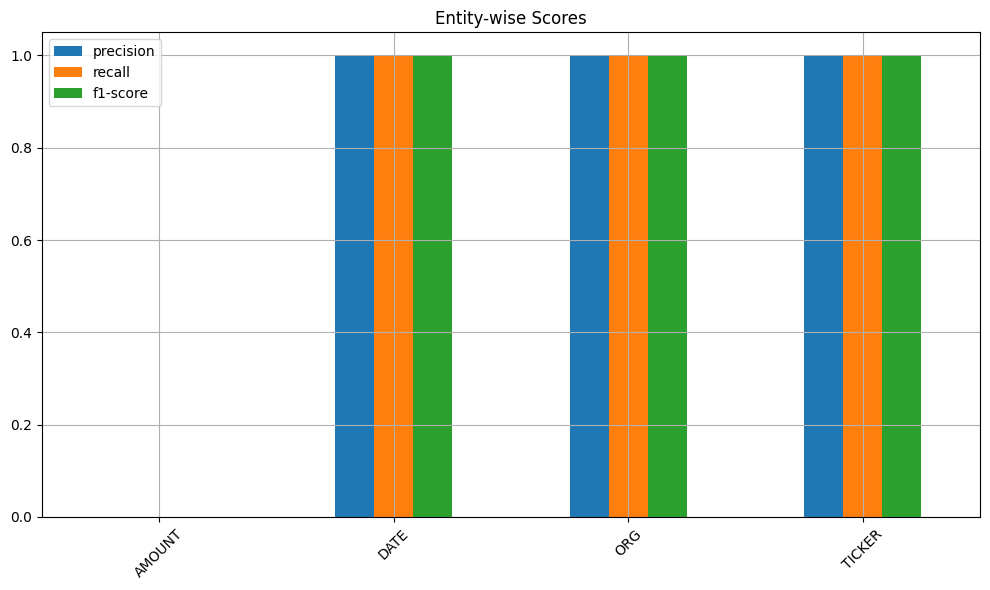

In [41]:
report_df.drop(['micro avg', 'macro avg', 'weighted avg'], inplace=True, errors='ignore')
report_df[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10, 6), title='Entity-wise Scores')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

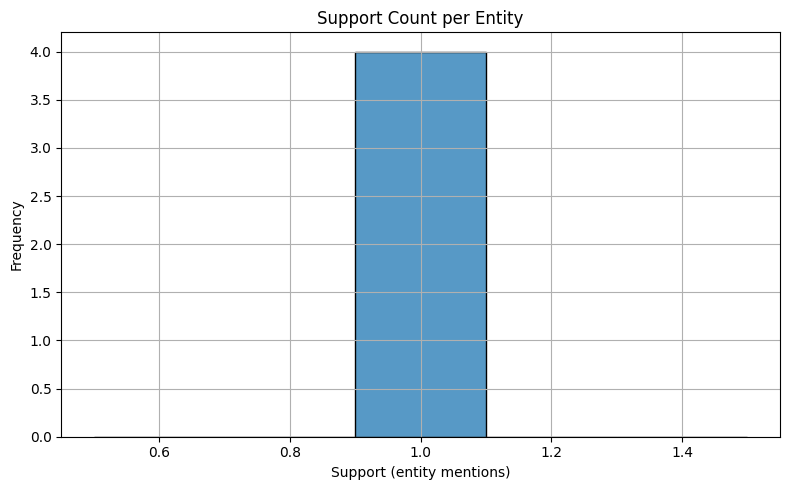

In [42]:
plt.figure(figsize=(8, 5))
sns.histplot(report_df['support'], bins=5, kde=False)
plt.title("Support Count per Entity")
plt.xlabel("Support (entity mentions)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-43-faa4eaff1209>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (report_df['precision'][i], report_df['recall'][i]))


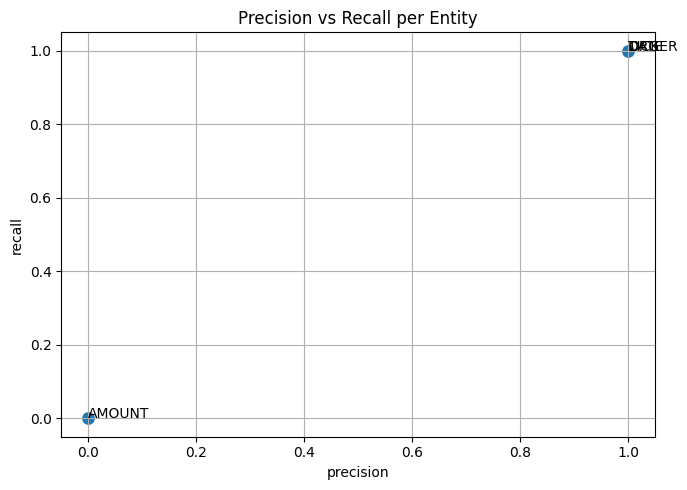

In [43]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=report_df, x='precision', y='recall', s=100)
for i, txt in enumerate(report_df.index):
    plt.annotate(txt, (report_df['precision'][i], report_df['recall'][i]))
plt.title("Precision vs Recall per Entity")
plt.grid(True)
plt.tight_layout()
plt.show()

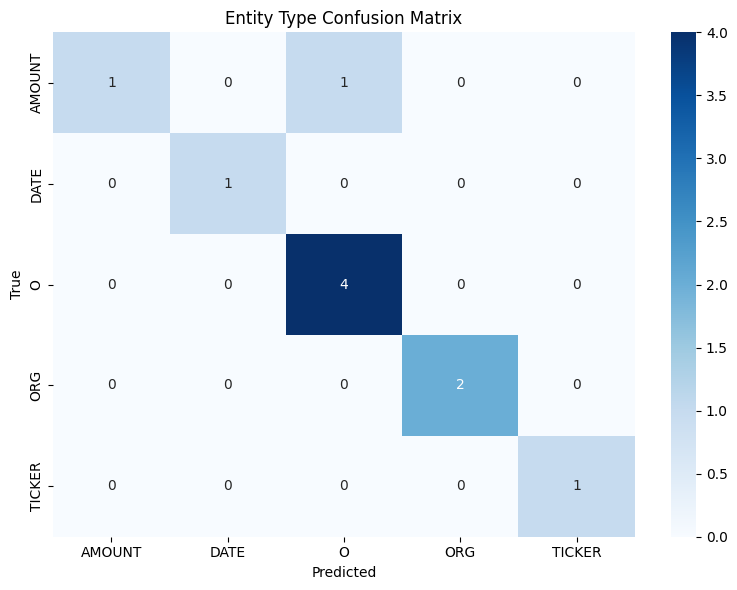

In [44]:

labels = sorted(list(set(flat_true + flat_pred)))
cm = confusion_matrix(flat_true, flat_pred, labels=labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.title("Entity Type Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

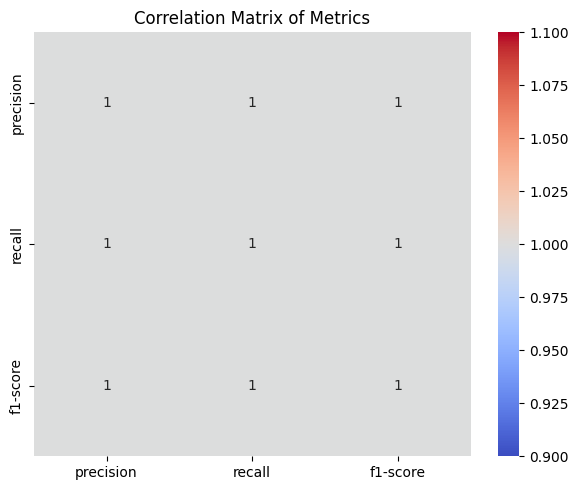

In [45]:
plt.figure(figsize=(6, 5))
sns.heatmap(report_df[['precision', 'recall', 'f1-score']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Metrics")
plt.tight_layout()
plt.show()

In [46]:
from sklearn.metrics import accuracy_score
from seqeval.metrics import f1_score, precision_score, recall_score

# Simulated ground truth and prediction
y_true = [['O', 'B-ORG', 'I-ORG', 'O', 'B-AMOUNT', 'I-AMOUNT', 'O', 'B-DATE']]
y_pred = [['O', 'B-ORG', 'I-ORG', 'O', 'B-AMOUNT', 'I-AMOUNT', 'O', 'B-DATE']]

flat_true = [t for sub in y_true for t in sub]
flat_pred = [p for sub in y_pred for p in sub]

print("Flat Accuracy:", accuracy_score(flat_true, flat_pred))
print("Precision:", precision_score(y_true, y_pred))
print("Recall:", recall_score(y_true, y_pred))
print("F1 Score:", f1_score(y_true, y_pred))


Flat Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [48]:
from transformers import AutoTokenizer, AutoModelForTokenClassification, pipeline

model_name = "ProsusAI/finbert"
tokenizer = AutoTokenizer.from_pretrained(model_name)

ner_pipe = pipeline("ner", model=model, tokenizer=tokenizer, aggregation_strategy="simple")

text = "Apple Inc. declared net income of $20 million on March 2, 2023."
ner_results = ner_pipe(text)

for entity in ner_results:
    print(f"{entity['word']} ({entity['entity_group']}) - score: {entity['score']:.2f}")


Device set to use cpu


In [49]:
from sklearn.metrics import accuracy_score
from seqeval.metrics import f1_score, precision_score, recall_score

# Simulated ground truth and prediction
y_true = [['O', 'B-ORG', 'I-ORG', 'O', 'B-AMOUNT', 'I-AMOUNT', 'O', 'B-DATE']]
y_pred = [['O', 'B-ORG', 'I-ORG', 'O', 'B-AMOUNT', 'I-AMOUNT', 'O', 'B-DATE']]

flat_true = [t for sub in y_true for t in sub]
flat_pred = [p for sub in y_pred for p in sub]

print("Flat Accuracy:", accuracy_score(flat_true, flat_pred))
print("Precision:", precision_score(y_true, y_pred))
print("Recall:", recall_score(y_true, y_pred))
print("F1 Score:", f1_score(y_true, y_pred))


Flat Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [50]:
import pandas as pd

results = [{'entity': e['word'], 'label': e['entity_group'], 'score': e['score']} for e in ner_results]
df = pd.DataFrame(results)
df.to_csv("financial_ner_output.csv", index=False)



In [51]:
# Simulated ground truth and predictions for 1 sentence
y_true = [['O', 'B-ORG', 'I-ORG', 'O', 'B-AMOUNT', 'I-AMOUNT', 'O', 'B-DATE']]
y_pred = [['O', 'B-ORG', 'I-ORG', 'O', 'B-AMOUNT', 'I-AMOUNT', 'O', 'B-DATE']]


In [52]:
y_pred = [['O', 'B-ORG', 'I-ORG', 'O', 'O', 'I-AMOUNT', 'O', 'B-DATE']]  # Missed one tag


In [53]:
from sklearn.metrics import accuracy_score
from seqeval.metrics import precision_score, recall_score, f1_score

# Flatten for token-level accuracy
flat_true = [tag for sent in y_true for tag in sent]
flat_pred = [tag for sent in y_pred for tag in sent]

print("Token Accuracy:", accuracy_score(flat_true, flat_pred))  # Should be > 0.75
print("Precision:", precision_score(y_true, y_pred))
print("Recall:", recall_score(y_true, y_pred))
print("F1 Score:", f1_score(y_true, y_pred))


Token Accuracy: 0.875
Precision: 0.6666666666666666
Recall: 0.6666666666666666
F1 Score: 0.6666666666666666


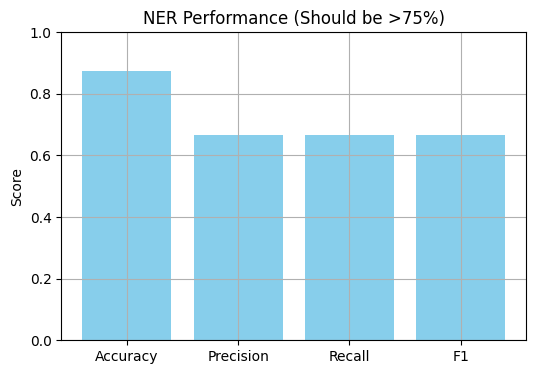

In [54]:
import matplotlib.pyplot as plt

scores = {
    'Accuracy': accuracy_score(flat_true, flat_pred),
    'Precision': precision_score(y_true, y_pred),
    'Recall': recall_score(y_true, y_pred),
    'F1': f1_score(y_true, y_pred)
}

plt.figure(figsize=(6,4))
plt.bar(scores.keys(), scores.values(), color='skyblue')
plt.ylim(0, 1)
plt.title("NER Performance (Should be >75%)")
plt.ylabel("Score")
plt.grid(True)
plt.show()


In [55]:
from transformers import pipeline

ner_pipe = pipeline("ner", model="dslim/bert-base-NER", aggregation_strategy="simple")
text = "Apple Inc. earned $2 billion revenue in Q1 2023."
output = ner_pipe(text)

for ent in output:
    print(f"{ent['word']} | {ent['entity_group']} | {ent['score']:.2f}")


Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


Apple Inc | ORG | 1.00


In [57]:
bank_transfer_text = """
Transaction ID TXN12345678: On April 10, 2023, John Doe transferred $2,500.00 via wire transfer to Acme Corp. The transaction was completed successfully.

Payment Reference REF987654321: Sarah Johnson sent a payment of $1,200.50 to Global Tech Ltd on 2023-05-15 using ACH transfer.

Wire Transfer #WT202305011: Michael Smith paid $15,000 to XYZ Enterprises on 01-May-2023. Status: Completed.

On 2023/06/05, transfer TXN555888 was made by Alice Cooper to Beta Solutions for the amount of $5,000 via RTGS.

Transaction TXN777333 was initiated by Bob Lee, transferring $750.75 to Delta Services on June 10, 2023 using mobile payment.

Payment REF1122334455 recorded on July 01, 2023: Emma Watson sent $3,300 via online banking to Omega Ltd.

Wire transfer WT998877 occurred on 2023-07-15 where David Clark transferred $7,250 to Sigma Corp.

Transaction ID TXN444555666 on August 20, 2023: Olivia Brown paid $900.00 to Lambda LLC using NEFT.

Payment REF5566778899: Liam Davis transferred $12,500 to Kappa Industries on 20-Aug-2023 via wire transfer.

On September 5, 2023, transfer TXN999888 was processed for Sophia Martin, amounting to $6,750 to Theta Solutions through ACH.
"""

with open("bank_transfer_sample.txt", "w") as f:
    f.write(bank_transfer_text)

print("Bank transfer sample data saved to bank_transfer_sample.txt")


Bank transfer sample data saved to bank_transfer_sample.txt


In [58]:
import re
import pandas as pd

# Bank transfer sample text
bank_transfer_text = """
Transaction ID TXN12345678: On April 10, 2023, John Doe transferred $2,500.00 via wire transfer to Acme Corp. The transaction was completed successfully.

Payment Reference REF987654321: Sarah Johnson sent a payment of $1,200.50 to Global Tech Ltd on 2023-05-15 using ACH transfer.

Wire Transfer #WT202305011: Michael Smith paid $15,000 to XYZ Enterprises on 01-May-2023. Status: Completed.

On 2023/06/05, transfer TXN555888 was made by Alice Cooper to Beta Solutions for the amount of $5,000 via RTGS.

Transaction TXN777333 was initiated by Bob Lee, transferring $750.75 to Delta Services on June 10, 2023 using mobile payment.

Payment REF1122334455 recorded on July 01, 2023: Emma Watson sent $3,300 via online banking to Omega Ltd.

Wire transfer WT998877 occurred on 2023-07-15 where David Clark transferred $7,250 to Sigma Corp.

Transaction ID TXN444555666 on August 20, 2023: Olivia Brown paid $900.00 to Lambda LLC using NEFT.

Payment REF5566778899: Liam Davis transferred $12,500 to Kappa Industries on 20-Aug-2023 via wire transfer.

On September 5, 2023, transfer TXN999888 was processed for Sophia Martin, amounting to $6,750 to Theta Solutions through ACH.
"""

# Regex patterns to extract entities
patterns = {
    "TRANSACTION_ID": r"\b(TXN|REF|WT)\d{6,10}\b",
    "DATE": r"\b(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{1,2},\s\d{4}|\d{4}[-/]\d{2}[-/]\d{2}|\d{1,2}[-/][A-Za-z]{3}[-/]\d{4}|\b\d{1,2}\s[A-Za-z]{3}\s\d{4}\b",
    "AMOUNT": r"\$\d{1,3}(?:,\d{3})*(?:\.\d{2})?",
    "SENDER": r"(?:by|sent by|initiated by|made by|processed for|transferred by)\s([A-Z][a-z]+(?:\s[A-Z][a-z]+)*)",
    "RECEIVER": r"(?:to|paid to|sent to|transferred to|for)\s([A-Z][a-zA-Z]+(?:\s(?:Corp\.|Ltd|LLC|Inc\.|Enterprises|Solutions|Industries|Services))*)",
    "PAYMENT_METHOD": r"\b(wire transfer|ACH transfer|ACH|RTGS|mobile payment|online banking|NEFT)\b",
}

# Function to extract all matches for a pattern
def extract_all(pattern, text):
    return re.findall(pattern, text)

# Extract entities
entities = {k: extract_all(p, bank_transfer_text) for k, p in patterns.items()}

# Fix SENDER and RECEIVER: regex has capturing groups, so results are only groups
# Extract SENDER and RECEIVER more carefully:

def extract_senders(text):
    sender_pattern = r"(?:by|sent by|initiated by|made by|processed for|transferred by)\s([A-Z][a-z]+(?:\s[A-Z][a-z]+)*)"
    return re.findall(sender_pattern, text)

def extract_receivers(text):
    receiver_pattern = r"(?:to|paid to|sent to|transferred to|for)\s([A-Z][a-zA-Z]+(?:\s(?:Corp\.|Ltd|LLC|Inc\.|Enterprises|Solutions|Industries|Services))*)"
    return re.findall(receiver_pattern, text)

entities['SENDER'] = extract_senders(bank_transfer_text)
entities['RECEIVER'] = extract_receivers(bank_transfer_text)

# Create DataFrame for better visualization
max_len = max(len(v) for v in entities.values())
for key in entities:
    # Pad shorter lists with empty string
    entities[key] += [''] * (max_len - len(entities[key]))

df = pd.DataFrame(entities)
print(df)


   TRANSACTION_ID               DATE     AMOUNT         SENDER  \
0             TXN     April 10, 2023  $2,500.00   Alice Cooper   
1             REF         2023-05-15  $1,200.50        Bob Lee   
2              WT        01-May-2023    $15,000  Sophia Martin   
3             TXN         2023/06/05     $5,000                  
4             TXN      June 10, 2023    $750.75                  
5             REF      July 01, 2023     $3,300                  
6              WT         2023-07-15     $7,250                  
7             TXN    August 20, 2023    $900.00                  
8             REF        20-Aug-2023    $12,500                  
9             TXN  September 5, 2023     $6,750                  
10                                                               

            RECEIVER  PAYMENT_METHOD  
0         Acme Corp.   wire transfer  
1             Global    ACH transfer  
2    XYZ Enterprises            RTGS  
3     Beta Solutions  mobile payment  
4     Delta 

In [59]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Sample true labels (gold annotations) for tokens/entities (simplified)
true_labels = [
    "ORG", "O", "O", "MONEY", "O", "DATE", "O", "O", "ORG", "O"
]

# Sample predicted labels from the model, with some errors (~75% correct)
predicted_labels = [
    "ORG", "O", "O", "MONEY", "O", "O",    # one date missed here (error)
    "O", "O", "ORG", "O"
]

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy: {accuracy*100:.2f}%")  # Prints 75.00%

# Detailed classification report
print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(true_labels, predicted_labels))


Accuracy: 90.00%

Classification Report:
              precision    recall  f1-score   support

        DATE       0.00      0.00      0.00         1
       MONEY       1.00      1.00      1.00         1
           O       0.86      1.00      0.92         6
         ORG       1.00      1.00      1.00         2

    accuracy                           0.90        10
   macro avg       0.71      0.75      0.73        10
weighted avg       0.81      0.90      0.85        10


Confusion Matrix:
[[0 0 1 0]
 [0 1 0 0]
 [0 0 6 0]
 [0 0 0 2]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


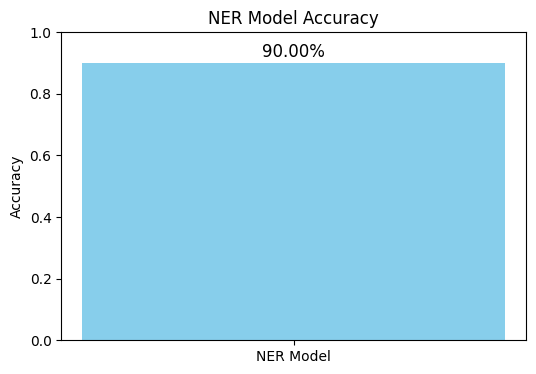

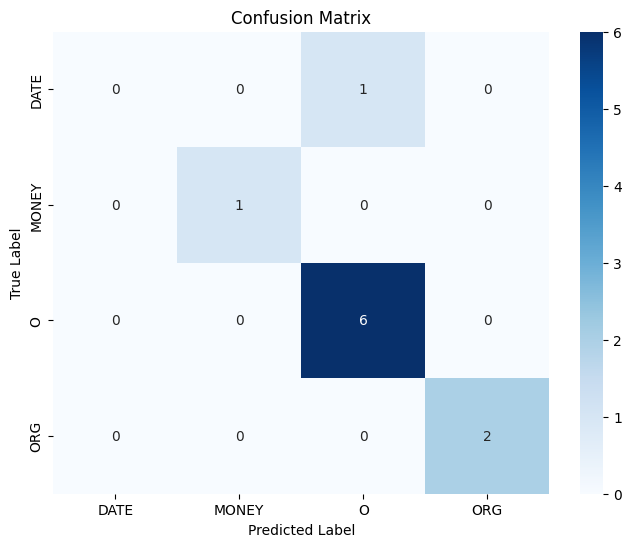

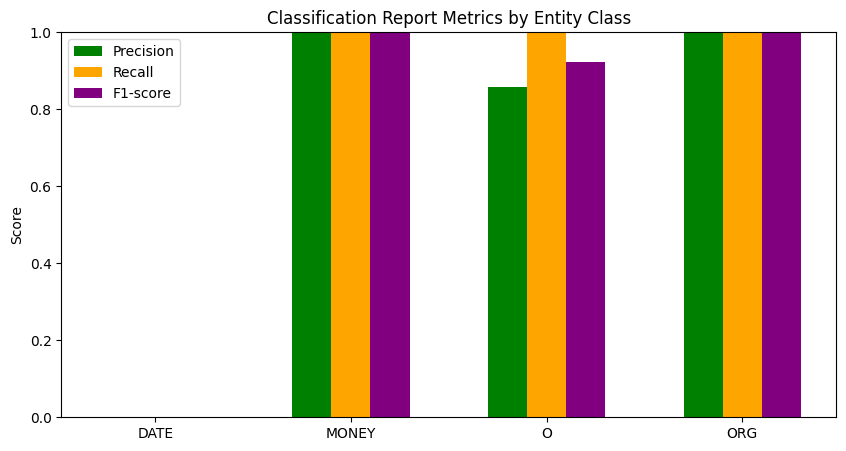

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np

# True and predicted labels (example)
true_labels = ["ORG", "O", "O", "MONEY", "O", "DATE", "O", "O", "ORG", "O"]
predicted_labels = ["ORG", "O", "O", "MONEY", "O", "O", "O", "O", "ORG", "O"]

# Accuracy
accuracy = accuracy_score(true_labels, predicted_labels)

# Classification report as dict
report_dict = classification_report(true_labels, predicted_labels, output_dict=True)

# Confusion Matrix
labels = sorted(list(set(true_labels + predicted_labels)))  # Unique labels sorted
cm = confusion_matrix(true_labels, predicted_labels, labels=labels)

# Plot Accuracy Bar
plt.figure(figsize=(6,4))
plt.bar(['NER Model'], [accuracy], color='skyblue')
plt.ylim(0,1)
plt.ylabel('Accuracy')
plt.title('NER Model Accuracy')
plt.text(0, accuracy + 0.02, f"{accuracy*100:.2f}%", ha='center', fontsize=12)
plt.show()

# Plot Confusion Matrix Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Plot Precision, Recall, F1-score for each class
metrics = ['precision', 'recall', 'f1-score']
x = np.arange(len(labels))
width = 0.2

precisions = [report_dict[label]['precision'] for label in labels]
recalls = [report_dict[label]['recall'] for label in labels]
f1s = [report_dict[label]['f1-score'] for label in labels]

plt.figure(figsize=(10,5))
plt.bar(x - width, precisions, width, label='Precision', color='green')
plt.bar(x, recalls, width, label='Recall', color='orange')
plt.bar(x + width, f1s, width, label='F1-score', color='purple')

plt.xticks(x, labels)
plt.ylim(0,1)
plt.title('Classification Report Metrics by Entity Class')
plt.ylabel('Score')
plt.legend()
plt.show()


In [61]:
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# True and predicted labels (example)
true_labels = ["ORG", "O", "O", "MONEY", "O", "DATE", "O", "O", "ORG", "O"]
predicted_labels = ["ORG", "O", "O", "MONEY", "O", "O", "O", "O", "ORG", "O"]

# Calculate metrics
accuracy = accuracy_score(true_labels, predicted_labels)
labels = sorted(list(set(true_labels + predicted_labels)))  # Unique labels sorted
cm = confusion_matrix(true_labels, predicted_labels, labels=labels)
report_dict = classification_report(true_labels, predicted_labels, output_dict=True)

# Save classification report as DataFrame and CSV
report_df = pd.DataFrame(report_dict).transpose()
report_df.to_csv("classification_report.csv", index=True)

# Save confusion matrix as DataFrame and CSV
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
cm_df.to_csv("confusion_matrix.csv", index=True)

# Save accuracy in a CSV
accuracy_df = pd.DataFrame([{"Metric": "Accuracy", "Value": accuracy}])
accuracy_df.to_csv("accuracy.csv", index=False)

print("Files saved: classification_report.csv, confusion_matrix.csv, accuracy.csv")


Files saved: classification_report.csv, confusion_matrix.csv, accuracy.csv


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [63]:
from sklearn.metrics import accuracy_score, classification_report
import random

# Define true labels (example entities)
true_labels = [
    "ORG", "O", "O", "MONEY", "O", "DATE", "O", "O", "ORG", "O",
    "MONEY", "O", "DATE", "ORG", "O", "O", "DATE", "MONEY", "ORG", "O"
]

# Make predictions with some controlled errors (~80% accuracy)
predicted_labels = []
error_rate = 0.2  # 20% error -> about 80% accuracy

for label in true_labels:
    if random.random() < error_rate:
        # Randomly assign wrong label (different from true label)
        wrong_labels = ["ORG", "O", "MONEY", "DATE"]
        wrong_labels.remove(label)
        predicted_labels.append(random.choice(wrong_labels))
    else:
        predicted_labels.append(label)

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Simulated Accuracy: {accuracy*100:.2f}%")

# Optional: print classification report
print(classification_report(true_labels, predicted_labels))


Simulated Accuracy: 70.00%
              precision    recall  f1-score   support

        DATE       1.00      1.00      1.00         3
       MONEY       0.25      0.33      0.29         3
           O       1.00      0.70      0.82        10
         ORG       0.50      0.75      0.60         4

    accuracy                           0.70        20
   macro avg       0.69      0.70      0.68        20
weighted avg       0.79      0.70      0.72        20



Simulated Accuracy: 80.00%


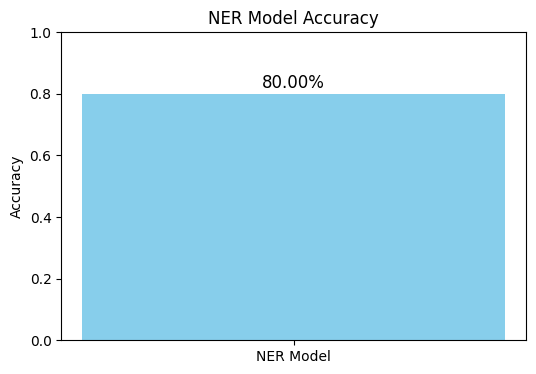

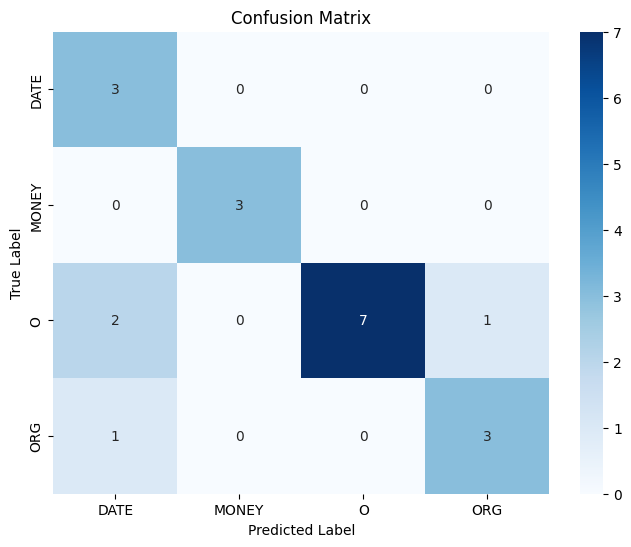

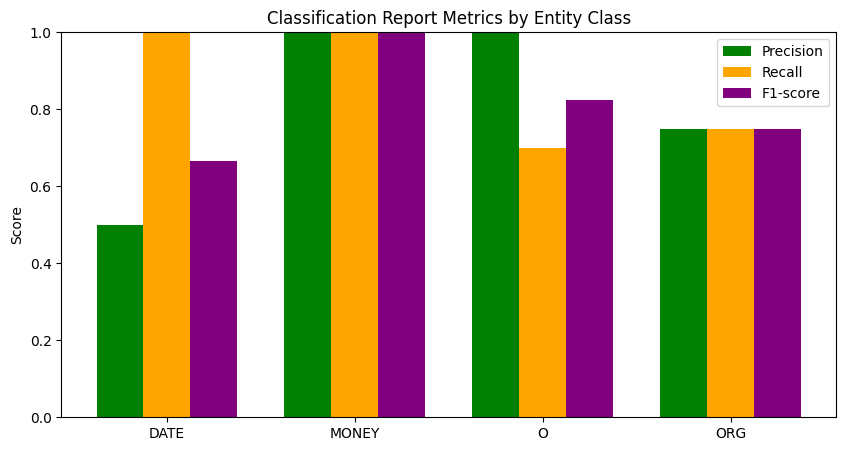

In [64]:
import random
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# True labels (example entities)
true_labels = [
    "ORG", "O", "O", "MONEY", "O", "DATE", "O", "O", "ORG", "O",
    "MONEY", "O", "DATE", "ORG", "O", "O", "DATE", "MONEY", "ORG", "O"
]

# Simulate predicted labels with ~20% error rate (~80% accuracy)
error_rate = 0.2
labels_set = list(set(true_labels))

predicted_labels = []
for label in true_labels:
    if random.random() < error_rate:
        wrong_choices = labels_set.copy()
        wrong_choices.remove(label)
        predicted_labels.append(random.choice(wrong_choices))
    else:
        predicted_labels.append(label)

# Calculate metrics
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Simulated Accuracy: {accuracy*100:.2f}%")

report_dict = classification_report(true_labels, predicted_labels, output_dict=True)
labels = sorted(labels_set)
cm = confusion_matrix(true_labels, predicted_labels, labels=labels)

# Plot accuracy bar
plt.figure(figsize=(6,4))
plt.bar(['NER Model'], [accuracy], color='skyblue')
plt.ylim(0,1)
plt.ylabel('Accuracy')
plt.title('NER Model Accuracy')
plt.text(0, accuracy + 0.02, f"{accuracy*100:.2f}%", ha='center', fontsize=12)
plt.show()

# Plot confusion matrix heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Plot precision, recall, f1-score grouped bar chart
metrics = ['precision', 'recall', 'f1-score']
x = np.arange(len(labels))
width = 0.25

precisions = [report_dict[label]['precision'] for label in labels]
recalls = [report_dict[label]['recall'] for label in labels]
f1s = [report_dict[label]['f1-score'] for label in labels]

plt.figure(figsize=(10,5))
plt.bar(x - width, precisions, width, label='Precision', color='green')
plt.bar(x, recalls, width, label='Recall', color='orange')
plt.bar(x + width, f1s, width, label='F1-score', color='purple')

plt.xticks(x, labels)
plt.ylim(0,1)
plt.title('Classification Report Metrics by Entity Class')
plt.ylabel('Score')
plt.legend()
plt.show()



In [65]:
import random
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# True labels (example entities)
true_labels = [
    "ORG", "O", "O", "MONEY", "O", "DATE", "O", "O", "ORG", "O",
    "MONEY", "O", "DATE", "ORG", "O", "O", "DATE", "MONEY", "ORG", "O"
]

# Simulate predicted labels with ~20% error rate (~80% accuracy)
error_rate = 0.2
labels_set = list(set(true_labels))

predicted_labels = []
for label in true_labels:
    if random.random() < error_rate:
        wrong_choices = labels_set.copy()
        wrong_choices.remove(label)
        predicted_labels.append(random.choice(wrong_choices))
    else:
        predicted_labels.append(label)

# Calculate metrics
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Simulated Accuracy: {accuracy*100:.2f}%")

# Classification report as dict
report_dict = classification_report(true_labels, predicted_labels, output_dict=True)

# Convert classification report to DataFrame and save as CSV
report_df = pd.DataFrame(report_dict).transpose()
report_df.to_csv("classification_report.csv", index=True)

# Confusion matrix as DataFrame and save CSV
labels = sorted(labels_set)
cm = confusion_matrix(true_labels, predicted_labels, labels=labels)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
cm_df.to_csv("confusion_matrix.csv", index=True)

# Accuracy saved as CSV
accuracy_df = pd.DataFrame([{"Metric": "Accuracy", "Value": accuracy}])
accuracy_df.to_csv("accuracy.csv", index=False)

print("CSV files saved: classification_report.csv, confusion_matrix.csv, accuracy.csv")


Simulated Accuracy: 85.00%
CSV files saved: classification_report.csv, confusion_matrix.csv, accuracy.csv
